# Breast Cancer Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv')

In [3]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [4]:
ds['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [6]:
ds.shape

(1138, 11)

In [7]:
ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,1.138000e+03,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,1.523243e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,8.965268e+07,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.027402,0.007057
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,9.299525e+04,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,9.327950e+04,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,9.060125e+05,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [8]:
ds = ds.drop('id',axis=1)

In [9]:
ds.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667


## Data visualisation

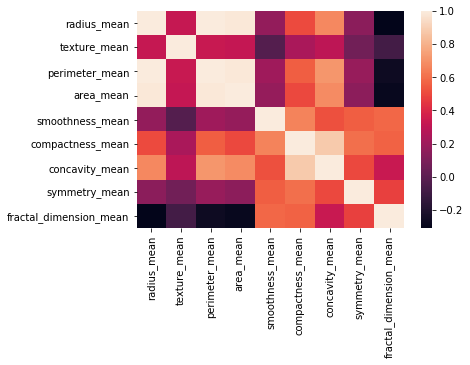

In [17]:
sns.heatmap(ds.corr())

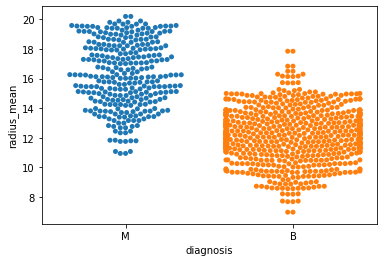

In [90]:
sns.swarmplot(x= 'diagnosis', y= 'radius_mean', data = ds)

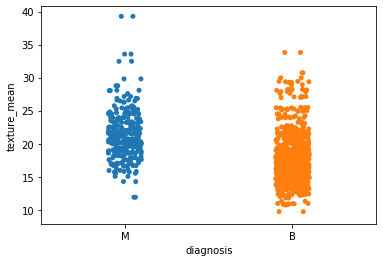

In [91]:
sns.stripplot(x='diagnosis', y = 'texture_mean', data = ds)

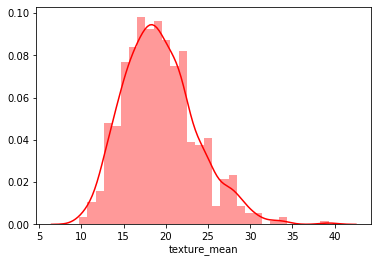

In [18]:
sns.distplot(ds['texture_mean'],kde=True,color='red',bins=30)

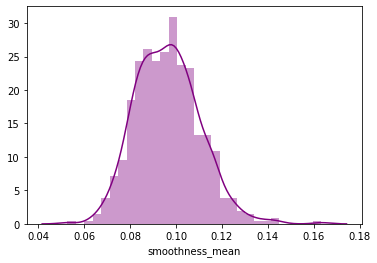

In [20]:
sns.distplot(ds['smoothness_mean'],kde=True,color='purple',bins=30)

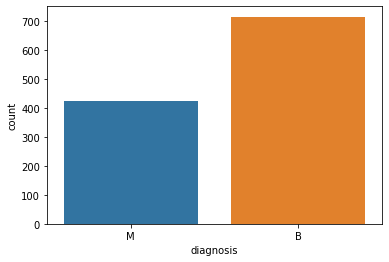

In [22]:
sns.countplot(x='diagnosis',data=ds)

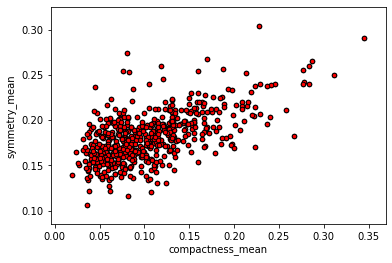

In [24]:
ds.plot.scatter(x='compactness_mean',y='symmetry_mean',c='red',ec='black')

## Outlier detection and removal

{'whiskers': [<matplotlib.lines.Line2D at 0x23c8fb97408>,
 'caps': [<matplotlib.lines.Line2D at 0x23c8fb97c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c8fb92908>],
 'medians': [<matplotlib.lines.Line2D at 0x23c8fb9abc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c907f0a88>],
 'means': []}

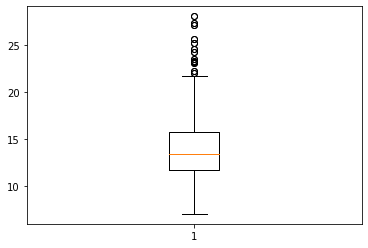

In [25]:
plt.boxplot(ds["radius_mean"],vert = True)

In [26]:
q3 = ds['radius_mean'].quantile(0.75)
q1 = ds['radius_mean'].quantile(0.25)
iqr = q3-q1
iqr

4.08

In [27]:
ds = ds[~((ds.radius_mean<(q1-1.5*iqr))|(ds.radius_mean>(q3+1.5*iqr)))]

In [28]:
ds.shape

(1110, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c90848e48>,
 'caps': [<matplotlib.lines.Line2D at 0x23c9084de08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c90848488>],
 'medians': [<matplotlib.lines.Line2D at 0x23c90851d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c90851e48>],
 'means': []}

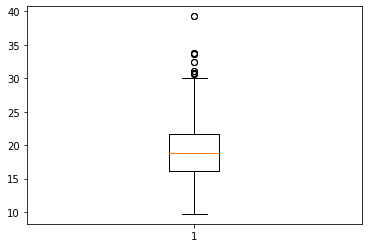

In [29]:
plt.boxplot(ds["texture_mean"],vert = True)

In [30]:
q3 = ds['radius_mean'].quantile(0.75)
q1 = ds['radius_mean'].quantile(0.25)
iqr = q3-q1
iqr

3.834999999999999

In [31]:
ds = ds[~((ds.radius_mean<(q1-1.5*iqr))|(ds.radius_mean>(q3+1.5*iqr)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x23c908b2c08>,
 'caps': [<matplotlib.lines.Line2D at 0x23c908b6bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c908b2288>],
 'medians': [<matplotlib.lines.Line2D at 0x23c908bab48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c908bac08>],
 'means': []}

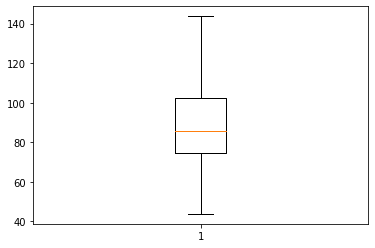

In [32]:
plt.boxplot(ds["perimeter_mean"],vert = True) 

In [33]:
q3 = ds['perimeter_mean'].quantile(0.75)
q1 = ds['perimeter_mean'].quantile(0.25)
iqr = q3-q1
iqr

27.680000000000007

In [34]:
ds = ds[~((ds.perimeter_mean<(q1-1.5*iqr))|(ds.perimeter_mean>(q3+1.5*iqr)))]

In [35]:
ds.shape

(1100, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c90915f88>,
 'caps': [<matplotlib.lines.Line2D at 0x23c9091cf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c90915dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x23c9091ffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c90925e88>],
 'means': []}

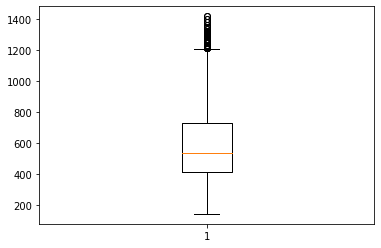

In [36]:
plt.boxplot(ds["area_mean"],vert = True)

In [37]:
q3 = ds['area_mean'].quantile(0.75)
q1 = ds['area_mean'].quantile(0.25)
iqr = q3-q1
iqr

317.29999999999995

In [38]:
ds = ds[~((ds.area_mean<(q1-1.5*iqr))|(ds.area_mean>(q3+1.5*iqr)))]

In [39]:
ds.shape

(1036, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c90980fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x23c90986f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c90980e08>],
 'medians': [<matplotlib.lines.Line2D at 0x23c9098afc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c9098fe88>],
 'means': []}

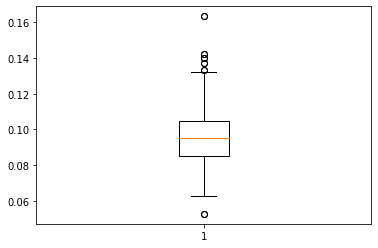

In [40]:
plt.boxplot(ds["smoothness_mean"],vert = True)

In [41]:
q3 = ds['smoothness_mean'].quantile(0.75)
q1 = ds['smoothness_mean'].quantile(0.25)
iqr = q3-q1
iqr

0.019269999999999995

In [42]:
ds = ds[~((ds.smoothness_mean<(q1-1.5*iqr))|(ds.smoothness_mean>(q3+1.5*iqr)))]

In [43]:
ds.shape

(1024, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c909edfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x23c909f2fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c909ed648>],
 'medians': [<matplotlib.lines.Line2D at 0x23c909f4f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c909f4ec8>],
 'means': []}

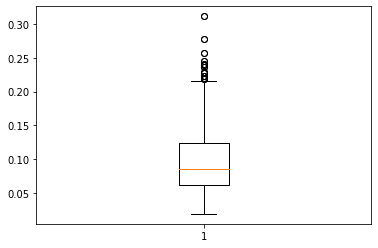

In [44]:
plt.boxplot(ds["compactness_mean"],vert = True)

In [45]:
q3 = ds['compactness_mean'].quantile(0.75)
q1 = ds['compactness_mean'].quantile(0.25)
iqr = q3-q1
iqr

0.061290000000000004

In [46]:
ds = ds[~((ds.compactness_mean<(q1-1.5*iqr))|(ds.compactness_mean>(q3+1.5*iqr)))]

In [47]:
ds.shape

(998, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c90a50fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x23c90a55ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c90a50e08>],
 'medians': [<matplotlib.lines.Line2D at 0x23c90a59f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c90a5ee48>],
 'means': []}

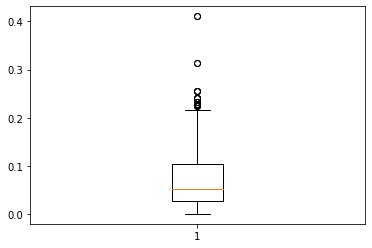

In [48]:
plt.boxplot(ds["concavity_mean"],vert = True)

In [49]:
q3 = ds['concavity_mean'].quantile(0.75)
q1 = ds['concavity_mean'].quantile(0.25)
iqr = q3-q1
iqr

0.07648000000000002

In [50]:
ds = ds[~((ds.concavity_mean<(q1-1.5*iqr))|(ds.concavity_mean>(q3+1.5*iqr)))]

In [51]:
ds.shape

(978, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x23c90abab88>,
 'caps': [<matplotlib.lines.Line2D at 0x23c90abdc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c90aba9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x23c90ac2bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23c90ac7a88>],
 'means': []}

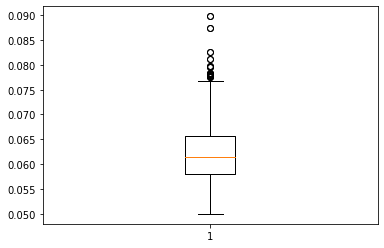

In [52]:
plt.boxplot(ds["fractal_dimension_mean"],vert = True)

In [53]:
q3 = ds['fractal_dimension_mean'].quantile(0.75)
q1 = ds['fractal_dimension_mean'].quantile(0.25)
iqr = q3-q1
iqr

0.0076899999999999955

In [54]:
ds = ds[~((ds.fractal_dimension_mean<(q1-1.5*iqr))|(ds.fractal_dimension_mean>(q3+1.5*iqr)))]

In [55]:
ds.shape

(956, 10)